# **1. Init The Data**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/upwork_data/DL_Classifier/spyTraining.csv')
df_train.head()

,close,high,low,open,volume,spyClass,marketdir,spyReturn,stkEMA,stkSMA,stkMAMA,stkFAMA,stkUBand,stkMBand,stkLBand,stkSar,stkADX,stkAPO,stkCCI,stkCMO,stkDX,stkMACD,stkMacdSig,stkMacdHis,stkMinusDi,stkMinusDm,stkMOM,stkPlusDi,stkPlusDM,stkPPO,stkROC,stkRSI,stkSlowK,stkSlowD,stkFastk,stkFastd,stkTrix,stkUltoSc,stkWillR,stkAD,...,stkBear,stkEMV,stkCOPP,stkSell,stkSTC,stkApzUpper,stkApzLower,stkVPT,stkFVE,stkWT1,stkVFI,stkMSD,stkFish,stkIFISH,stkTen,stkKij,stkSena,stkSenb,stkChik,stkdirect,debt,ebitda,eps,freeCashFlow,grossMargin,grossProfit,ppeq,rps,sharesBasic,taxExp,marketCap,enterpriseVal,peRatio,pbRatio,trailingPEG1Y,dailyReturns,Symbol,slope1,intercept,Class
0,44.38,44.700,43.4100,43.45,1502362,0.6,11.098540,0.251597,43.992141,43.263848,44.288891,43.549365,47.502642,43.3000,39.097358,38.012000,21.420705,2.118889,95.531126,18.718260,13.406777,0.180898,0.142956,0.037942,20.942051,4.426528,2.46,27.426748,5.797201,-2.471695,5.868321,59.359130,93.781402,88.127534,93.176972,93.781402,0.263262,64.665561,-12.681638,-2.139938e+07,...,0.646146,47.922861,-7.579808,0.331138,95.816592,46.467695,39.593619,-2.492951e+07,20.409761,9.313714,2.300413,2.101512,0.390830,0.295195,41.671056,43.061858,42.366457,42.037237,41.136923,0.728293,0.000000e+00,2.002330e+08,1.235,1.670835e+08,0.945276,5.522685e+08,2.897550e+08,2.222309,102126645,40839500.0,4.276914e+09,3.706300e+09,21.970297,2.617380,0.708251,2.069917,DLB,-2.005824,2.804088,Buy
1,42.54,43.310,41.3145,41.62,17646101,0.8,-21.282109,2.611038,41.990151,42.352833,41.847644,42.485300,46.589152,42.3485,38.107848,45.840560,20.437463,-1.736667,-63.792946,9.037488,0.124480,1.392845,1.753303,-0.360458,18.266412,4.231787,-2.03,18.311945,4.242336,5.969690,-4.554633,54.518744,26.975537,23.516246,36.302895,26.975537,0.505683,47.480032,-65.840708,2.835258e+08,...,-1.398917,5.849628,16.619490,1.288532,-184.991552,47.555724,40.556058,3.302258e+08,16.149790,37.244043,-1.549662,2.326559,-0.336559,0.012995,43.776917,41.005663,42.391290,37.991681,35.076154,-0.362681,6.248400e+08,8.688435e+08,1.200,6.086350e+08,0.211244,1.256400e+09,1.512600e+09,4.735720,533117904,114355000.0,2.217191e+10,2.233761e+10,22.272251,4.046311,1.141453,2.014388,HRL,0.415151,-0.988122,Buy
2,19.55,19.910,18.6700,19.51,667416,0.4,8.962298,0.036620,19.168897,19.776536,19.532483,19.172038,20.029443,18.7560,17.482557,16.750000,9.152934,0.932222,65.600063,7.277109,8.397799,-0.302425,-0.493087,0.190661,19.881631,3.160253,0.96,23.527000,3.739697,-0.669735,5.164067,53.638555,76.821478,69.310769,82.733813,76.821478,-0.470611,57.458940,-23.988439,1.764450e+07,...,-0.204243,32.127758,-0.066727,0.401383,3756.002869,21.395954,15.533533,9.764142e+06,-26.000465,-5.155818,-10.018756,0.726587,0.206022,0.592861,18.593606,18.911635,18.752620,20.077703,21.308077,-0.607639,4.101810e+08,1.183200e+07,0.120,8.770000e+05,0.316157,7.481700e+07,4.251770e+08,4.896915,48325322,2396000.0,9.542898e+08,1.171917e+09,488.750000,1.124907,-7.974342,0.307850,DIOD,-2.643339,1.705525,Buy
3,158.99,165.910,157.3100,163.63,16124603,0.6,4.245777,2.551115,163.129876,155.108344,159.465760,160.228833,168.032944,151.1040,134.175056,141.819557,16.078156,4.207778,68.465931,12.259861,18.437844,4.073800,2.554425,1.519375,16.441493,18.563229,-5.62,23.874982,26.955992,3.152459,-3.414130,56.129931,67.389421,80.395139,34.485896,67.389421,0.102671,62.542186,-23.952096,3.894161e+08,...,1.504554,131.246336,16.468358,2.288512,311.331721,176.794787,139.135516,3.582811e+08,6.613440,42.381596,33.125470,8.466157,2.305304,0.161354,155.183333,149.943988,152.563661,149.155495,148.161538,8.021532,4.305700e+10,1.538000e+09,1.560,-1.938000e+09,0.319639,2.552000e+09,1.268900e+10,25.061934,318570788,184000000.0,4.946435e+10,8.889535e+10,15.055871,4.463697,-0.077617,-2.310292,DE,0.063449,-0.918233,Buy
4,34.90,35.605,34.3800,35.46,6222214,0.4,2.761989,-0.229066,35.841776,35.650699,35.046177,35.674424,38.033080,36.0800,34.126920,33.137296,19.104177,-0.613889,-55.492289,-1.823411,11.111756,0.881921,1.143853,-0.2

In [ ]:
df_train.drop(['Symbol'], axis=1, inplace=True)
df_train.head()

,close,high,low,open,volume,spyClass,marketdir,spyReturn,stkEMA,stkSMA,stkMAMA,stkFAMA,stkUBand,stkMBand,stkLBand,stkSar,stkADX,stkAPO,stkCCI,stkCMO,stkDX,stkMACD,stkMacdSig,stkMacdHis,stkMinusDi,stkMinusDm,stkMOM,stkPlusDi,stkPlusDM,stkPPO,stkROC,stkRSI,stkSlowK,stkSlowD,stkFastk,stkFastd,stkTrix,stkUltoSc,stkWillR,stkAD,...,stkBull,stkBear,stkEMV,stkCOPP,stkSell,stkSTC,stkApzUpper,stkApzLower,stkVPT,stkFVE,stkWT1,stkVFI,stkMSD,stkFish,stkIFISH,stkTen,stkKij,stkSena,stkSenb,stkChik,stkdirect,debt,ebitda,eps,freeCashFlow,grossMargin,grossProfit,ppeq,rps,sharesBasic,taxExp,marketCap,enterpriseVal,peRatio,pbRatio,trailingPEG1Y,dailyReturns,slope1,intercept,Class
0,44.38,44.700,43.4100,43.45,1502362,0.6,11.098540,0.251597,43.992141,43.263848,44.288891,43.549365,47.502642,43.3000,39.097358,38.012000,21.420705,2.118889,95.531126,18.718260,13.406777,0.180898,0.142956,0.037942,20.942051,4.426528,2.46,27.426748,5.797201,-2.471695,5.868321,59.359130,93.781402,88.127534,93.176972,93.781402,0.263262,64.665561,-12.681638,-2.139938e+07,...,1.936146,0.646146,47.922861,-7.579808,0.331138,95.816592,46.467695,39.593619,-2.492951e+07,20.409761,9.313714,2.300413,2.101512,0.390830,0.295195,41.671056,43.061858,42.366457,42.037237,41.136923,0.728293,0.000000e+00,2.002330e+08,1.235,1.670835e+08,0.945276,5.522685e+08,2.897550e+08,2.222309,102126645,40839500.0,4.276914e+09,3.706300e+09,21.970297,2.617380,0.708251,2.069917,-2.005824,2.804088,Buy
1,42.54,43.310,41.3145,41.62,17646101,0.8,-21.282109,2.611038,41.990151,42.352833,41.847644,42.485300,46.589152,42.3485,38.107848,45.840560,20.437463,-1.736667,-63.792946,9.037488,0.124480,1.392845,1.753303,-0.360458,18.266412,4.231787,-2.03,18.311945,4.242336,5.969690,-4.554633,54.518744,26.975537,23.516246,36.302895,26.975537,0.505683,47.480032,-65.840708,2.835258e+08,...,0.596583,-1.398917,5.849628,16.619490,1.288532,-184.991552,47.555724,40.556058,3.302258e+08,16.149790,37.244043,-1.549662,2.326559,-0.336559,0.012995,43.776917,41.005663,42.391290,37.991681,35.076154,-0.362681,6.248400e+08,8.688435e+08,1.200,6.086350e+08,0.211244,1.256400e+09,1.512600e+09,4.735720,533117904,114355000.0,2.217191e+10,2.233761e+10,22.272251,4.046311,1.141453,2.014388,0.415151,-0.988122,Buy
2,19.55,19.910,18.6700,19.51,667416,0.4,8.962298,0.036620,19.168897,19.776536,19.532483,19.172038,20.029443,18.7560,17.482557,16.750000,9.152934,0.932222,65.600063,7.277109,8.397799,-0.302425,-0.493087,0.190661,19.881631,3.160253,0.96,23.527000,3.739697,-0.669735,5.164067,53.638555,76.821478,69.310769,82.733813,76.821478,-0.470611,57.458940,-23.988439,1.764450e+07,...,1.035757,-0.204243,32.127758,-0.066727,0.401383,3756.002869,21.395954,15.533533,9.764142e+06,-26.000465,-5.155818,-10.018756,0.726587,0.206022,0.592861,18.593606,18.911635,18.752620,20.077703,21.308077,-0.607639,4.101810e+08,1.183200e+07,0.120,8.770000e+05,0.316157,7.481700e+07,4.251770e+08,4.896915,48325322,2396000.0,9.542898e+08,1.171917e+09,488.750000,1.124907,-7.974342,0.307850,-2.643339,1.705525,Buy
3,158.99,165.910,157.3100,163.63,16124603,0.6,4.245777,2.551115,163.129876,155.108344,159.465760,160.228833,168.032944,151.1040,134.175056,141.819557,16.078156,4.207778,68.465931,12.259861,18.437844,4.073800,2.554425,1.519375,16.441493,18.563229,-5.62,23.874982,26.955992,3.152459,-3.414130,56.129931,67.389421,80.395139,34.485896,67.389421,0.102671,62.542186,-23.952096,3.894161e+08,...,10.104554,1.504554,131.246336,16.468358,2.288512,311.331721,176.794787,139.135516,3.582811e+08,6.613440,42.381596,33.125470,8.466157,2.305304,0.161354,155.183333,149.943988,152.563661,149.155495,148.161538,8.021532,4.305700e+10,1.538000e+09,1.560,-1.938000e+09,0.319639,2.552000e+09,1.268900e+10,25.061934,318570788,184000000.0,4.946435e+10,8.889535e+10,15.055871,4.463697,-0.077617,-2.310292,0.063449,-0.918233,Buy
4,34.90,35.605,34.3800,35.46,6222214,0.4,2.761989,-0.229066,35.841776,35.650699,35.046177,35.674424,38.033080,36.0800,34.126920,33.137296,19.104177,-0.613889,-55.492289,-1.823411,11.111756,

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67188 entries, 0 to 67187
Columns: 116 entries, close to Class
dtypes: float64(112), int64(3), object(1)
memory usage: 59.5+ MB


In [ ]:
# list_float = [key for key in dict(df_train.dtypes) if dict(df_train.dtypes)[key] in ['int64']]

In [ ]:
df_train.shape

(67188, 116)

Number of Buy		:  13636
Number of Hold		:  17820
Number of Sell		:  12690
Number of StrongBuy	:  11435
Number of StrongSell	:  11607


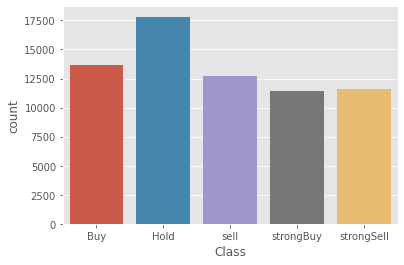

In [ ]:
ax = sns.countplot(df_train['Class'],label="Count")
hl, by, sl, ss, sb = df_train['Class'].value_counts()

print('Number of Buy\t\t: ',by)
print('Number of Hold\t\t: ',hl)
print('Number of Sell\t\t: ',sl)
print('Number of StrongBuy\t: ',sb)
print('Number of StrongSell\t: ',ss)

# **2. Preprocessing Data**

In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.pipeline import Pipeline, FeatureUnion
from numpy import argmax
import numpy as np
from keras.utils import to_categorical

In [ ]:
X = df_train.drop(['Class'], axis=1) 
y = df_train['Class']
X.head()

,close,high,low,open,volume,spyClass,marketdir,spyReturn,stkEMA,stkSMA,stkMAMA,stkFAMA,stkUBand,stkMBand,stkLBand,stkSar,stkADX,stkAPO,stkCCI,stkCMO,stkDX,stkMACD,stkMacdSig,stkMacdHis,stkMinusDi,stkMinusDm,stkMOM,stkPlusDi,stkPlusDM,stkPPO,stkROC,stkRSI,stkSlowK,stkSlowD,stkFastk,stkFastd,stkTrix,stkUltoSc,stkWillR,stkAD,...,stkCFI,stkBull,stkBear,stkEMV,stkCOPP,stkSell,stkSTC,stkApzUpper,stkApzLower,stkVPT,stkFVE,stkWT1,stkVFI,stkMSD,stkFish,stkIFISH,stkTen,stkKij,stkSena,stkSenb,stkChik,stkdirect,debt,ebitda,eps,freeCashFlow,grossMargin,grossProfit,ppeq,rps,sharesBasic,taxExp,marketCap,enterpriseVal,peRatio,pbRatio,trailingPEG1Y,dailyReturns,slope1,intercept
0,44.38,44.700,43.4100,43.45,1502362,0.6,11.098540,0.251597,43.992141,43.263848,44.288891,43.549365,47.502642,43.3000,39.097358,38.012000,21.420705,2.118889,95.531126,18.718260,13.406777,0.180898,0.142956,0.037942,20.942051,4.426528,2.46,27.426748,5.797201,-2.471695,5.868321,59.359130,93.781402,88.127534,93.176972,93.781402,0.263262,64.665561,-12.681638,-2.139938e+07,...,-1.710310e+08,1.936146,0.646146,47.922861,-7.579808,0.331138,95.816592,46.467695,39.593619,-2.492951e+07,20.409761,9.313714,2.300413,2.101512,0.390830,0.295195,41.671056,43.061858,42.366457,42.037237,41.136923,0.728293,0.000000e+00,2.002330e+08,1.235,1.670835e+08,0.945276,5.522685e+08,2.897550e+08,2.222309,102126645,40839500.0,4.276914e+09,3.706300e+09,21.970297,2.617380,0.708251,2.069917,-2.005824,2.804088
1,42.54,43.310,41.3145,41.62,17646101,0.8,-21.282109,2.611038,41.990151,42.352833,41.847644,42.485300,46.589152,42.3485,38.107848,45.840560,20.437463,-1.736667,-63.792946,9.037488,0.124480,1.392845,1.753303,-0.360458,18.266412,4.231787,-2.03,18.311945,4.242336,5.969690,-4.554633,54.518744,26.975537,23.516246,36.302895,26.975537,0.505683,47.480032,-65.840708,2.835258e+08,...,-4.910448e+08,0.596583,-1.398917,5.849628,16.619490,1.288532,-184.991552,47.555724,40.556058,3.302258e+08,16.149790,37.244043,-1.549662,2.326559,-0.336559,0.012995,43.776917,41.005663,42.391290,37.991681,35.076154,-0.362681,6.248400e+08,8.688435e+08,1.200,6.086350e+08,0.211244,1.256400e+09,1.512600e+09,4.735720,533117904,114355000.0,2.217191e+10,2.233761e+10,22.272251,4.046311,1.141453,2.014388,0.415151,-0.988122
2,19.55,19.910,18.6700,19.51,667416,0.4,8.962298,0.036620,19.168897,19.776536,19.532483,19.172038,20.029443,18.7560,17.482557,16.750000,9.152934,0.932222,65.600063,7.277109,8.397799,-0.302425,-0.493087,0.190661,19.881631,3.160253,0.96,23.527000,3.739697,-0.669735,5.164067,53.638555,76.821478,69.310769,82.733813,76.821478,-0.470611,57.458940,-23.988439,1.764450e+07,...,-2.350864e+07,1.035757,-0.204243,32.127758,-0.066727,0.401383,3756.002869,21.395954,15.533533,9.764142e+06,-26.000465,-5.155818,-10.018756,0.726587,0.206022,0.592861,18.593606,18.911635,18.752620,20.077703,21.308077,-0.607639,4.101810e+08,1.183200e+07,0.120,8.770000e+05,0.316157,7.481700e+07,4.251770e+08,4.896915,48325322,2396000.0,9.542898e+08,1.171917e+09,488.750000,1.124907,-7.974342,0.307850,-2.643339,1.705525
3,158.99,165.910,157.3100,163.63,16124603,0.6,4.245777,2.551115,163.129876,155.108344,159.465760,160.228833,168.032944,151.1040,134.175056,141.819557,16.078156,4.207778,68.465931,12.259861,18.437844,4.073800,2.554425,1.519375,16.441493,18.563229,-5.62,23.874982,26.955992,3.152459,-3.414130,56.129931,67.389421,80.395139,34.485896,67.389421,0.102671,62.542186,-23.952096,3.894161e+08,...,4.402302e+08,10.104554,1.504554,131.246336,16.468358,2.288512,311.331721,176.794787,139.135516,3.582811e+08,6.613440,42.381596,33.125470,8.466157,2.305304,0.161354,155.183333,149.943988,152.563661,149.155495,148.161538,8.021532,4.305700e+10,1.538000e+09,1.560,-1.938000e+09,0.319639,2.552000e+09,1.268900e+10,25.061934,318570788,184000000.0,4.946435e+10,8.889535e+10,15.055871,4.463697,-0.077617,-2.310292,0.063449,-0.918233
4,34.90,35.605,34.3800,35.46,6222214,0.4,2.761989,-0.229066,35.841776,35.650699,35.046177,35.674424,38.033080,36.0800,34.126920,33.137296,19.104177,-

## Normalise Feature

In [ ]:
#MinMaxScaler
# X = (X -np.min(X))/(np.max(X)-np.min(X)) 

#StandardScaler
X = (X - X.mean())/X.std()

# PowerTransformer
# pt = PowerTransformer(method='yeo-johnson', standardize=True)
# X = pt.fit_transform(X) 

X

,close,high,low,open,volume,spyClass,marketdir,spyReturn,stkEMA,stkSMA,stkMAMA,stkFAMA,stkUBand,stkMBand,stkLBand,stkSar,stkADX,stkAPO,stkCCI,stkCMO,stkDX,stkMACD,stkMacdSig,stkMacdHis,stkMinusDi,stkMinusDm,stkMOM,stkPlusDi,stkPlusDM,stkPPO,stkROC,stkRSI,stkSlowK,stkSlowD,stkFastk,stkFastd,stkTrix,stkUltoSc,stkWillR,stkAD,...,stkCFI,stkBull,stkBear,stkEMV,stkCOPP,stkSell,stkSTC,stkApzUpper,stkApzLower,stkVPT,stkFVE,stkWT1,stkVFI,stkMSD,stkFish,stkIFISH,stkTen,stkKij,stkSena,stkSenb,stkChik,stkdirect,debt,ebitda,eps,freeCashFlow,grossMargin,grossProfit,ppeq,rps,sharesBasic,taxExp,marketCap,enterpriseVal,peRatio,pbRatio,trailingPEG1Y,dailyReturns,slope1,intercept
0,-0.419276,-0.429045,-0.415948,-0.430287,-0.451429,0.408673,0.905152,0.095780,-0.424127,-0.435412,-0.420811,-0.431552,-0.439090,-0.436043,-0.419027,-0.486925,-0.546017,0.210617,0.757406,0.475238,-0.721829,-0.098493,-0.138784,0.073416,-0.044637,-0.367100,0.167351,0.646416,-0.316759,-0.469921,0.560999,0.475238,1.533675,1.399779,1.263574,1.533675,0.160910,0.867682,1.044638,-0.580448,...,-0.200404,-0.057204,0.252284,-0.168859,-0.485332,-0.490682,-0.027536,-0.448583,-0.424354,-0.450240,0.494512,-0.081931,-0.544134,-0.339593,-0.023925,-0.005464,-0.452104,-0.438332,-0.446067,-0.443476,-0.441849,0.072436,-0.307122,-0.442176,0.002523,-0.220465,1.654041,-0.417469,-0.453886,-0.589249,-0.467824,-0.251354,-0.499717,-0.547200,0.013353,-0.013349,0.013353,0.359412,-1.259213,1.067722
1,-0.439656,-0.444018,-0.439883,-0.450602,-0.096752,1.625347,-2.129256,0.986323,-0.446301,-0.445578,-0.447892,-0.443440,-0.448073,-0.446818,-0.431841,-0.400132,-0.636936,-0.188503,-0.702839,0.112788,-1.410964,0.101576,0.155455,-0.106114,-0.359148,-0.376645,-0.133004,-0.494700,-0.402139,0.789447,-0.504664,0.112788,-1.114621,-1.350958,-0.608507,-1.114621,0.643386,-0.424781,-0.724848,-0.226415,...,-0.314857,-0.181886,0.067961,-0.256088,0.523603,-0.024557,-0.027536,-0.437589,-0.412695,-0.199088,0.322341,0.647166,-0.851266,-0.316510,-0.417006,-0.005464,-0.428544,-0.461911,-0.445785,-0.491479,-0.515148,-0.036112,-0.297503,-0.250231,-0.015824,-0.111339,-1.066944,-0.324796,-0.380996,-0.414290,-0.144240,-0.175842,-0.279529,-0.348777,0.013353,-0.006870,0.013353,0.349694,-0.264097,-0.387438
2,-0.694290,-0.696082,-0.698531,-0.696047,-0.469773,-0.808001,0.704963,0.014639,-0.699067,-0.697495,-0.695435,-0.703907,-0.709250,-0.713981,-0.698920,-0.722650,-1.680401,0.087775,0.483080,0.046880,-0.981713,-0.178281,-0.255000,0.142235,-0.169285,-0.429169,0.067009,0.158192,-0.429740,-0.201087,0.488995,0.046880,0.861355,0.598681,0.919825,0.861355,-1.299673,0.325697,0.668273,-0.535116,...,-0.147643,-0.141009,0.175638,-0.201607,-0.172091,-0.456482,-0.027536,-0.701915,-0.715819,-0.425706,-1.381204,-0.459646,-1.526869,-0.480624,-0.123796,-0.005464,-0.710295,-0.715277,-0.713978,-0.704041,-0.681657,-0.060485,-0.300808,-0.496263,-0.581950,-0.261542,-0.678042,-0.480308,-0.445814,-0.403069,-0.508217,-0.290842,-0.540600,-0.574191,0.013353,-0.020116,0.013353,0.051033,-1.521256,0.646178
3,0.850128,0.876625,0.885028,0.903844,-0.130180,0.408673,0.262976,0.963706,0.895435,0.812605,0.856850,0.872046,0.746156,0.784738,0.812143,0.663958,-1.040035,0.426854,0.509347,0.233435,-0.460799,0.544152,0.301834,0.740990,-0.573660,0.325848,-0.373154,0.201757,0.845099,0.369145,-0.388057,0.233435,0.487453,1.070583,-0.668316,0.487453,-0.158704,0.707991,0.669483,-0.103471,...,0.018213,0.703090,0.329653,0.003892,0.517302,0.462303,-0.027536,0.868281,0.781502,-0.179248,-0.063080,0.781277,1.914867,0.313248,1.010655,-0.005464,0.817871,0.787349,0.804176,0.827554,0.852494,0.798093,0.355692,-0.058129,0.172885,-0.740722,-0.665134,-0.154279,0.285188,1.000624,-0.305320,-0.104306,0.056288,0.360062,0.013353,-0.004978,0.013353,-0.407167,-0.408661,-0.360620
4,-0.524275,-0.527016,-0.519090,-0.518985,-0.347734,-0.808001,0.123929,-0.085641,-0.514400,-0.520363,-0.523341,-0.519535,-0.532210,-0.517803,-0.483390,-0.540969,-0.760223,-0.072275,-0.626761,-0.293846,-0.840903,0.017232,0.0440

## Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import f_classif, chi2
from sklearn.ensemble import ExtraTreesClassifier
from collections import Counter

In [ ]:
# Encode target to number for feature selection process
LabelE = LabelEncoder()
y = LabelE.fit_transform(y)
y

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
num_selected = 85

# ANOVA feature selection for numeric input and categorical output
# anova_fs = SelectKBest(score_func=f_classif, k=num_selected)
# anova_feature = anova_fs.fit(X, y)
# anova_idx = anova_fs.get_support()
# selected_anova = X.columns[anova_idx]
# print("Selected Feature : ", num_selected)
# print(selected_anova)
# X = X[selected_anova]

# chi square feature selection for numeric input and categorical output
# in chi square there cannot be a negative value on a feature
# must use minmax norm
# chi_fs = SelectKBest(chi2, k=num_selected)
# chi_feature = chi_fs.fit(X, y)
# chi_idx = chi_feature.get_support()
# selected_chi = X.columns[chi_idx]
# print("Selected Feature : ", num_selected)
# print(selected_chi)
# X = X[selected_chi]

# ExtraTrees feature selection for numeric input and categorical output
# This selection feature determines itself, which features are selected
# forest_model = ExtraTreesClassifier(n_estimators=250, random_state=0)
# forest_clf = forest_model.fit(X, y)
# forest_fs = SelectFromModel(forest_clf, prefit=True)
# forest_idx = forest_fs.get_support()
# selected_forest = X.columns[forest_idx]
# print("Selected Feature : ", selected_forest.shape[0])
# print(selected_forest)
# X = X[selected_forest]

# X.head()

## Dimensionality reduction (PCA)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=85)
X = pca.fit_transform(X)
X

array([[-2.37140392e+00, -2.54639957e+00, -1.81622849e+00, ...,
        -5.69593507e-02, -2.90431627e-02,  1.01415848e-02],
       [-2.51271215e+00,  3.97577369e-01, -2.02372335e-01, ...,
        -1.84665294e-02, -2.46428880e-02,  5.09965761e-03],
       [-4.31086287e+00, -3.94555458e-01, -1.85770343e+00, ...,
        -5.64261698e-02, -1.29714070e-02, -5.82771751e-03],
       ...,
       [-1.88801302e+00,  6.58934717e+00,  2.80888076e+00, ...,
        -9.15811510e-02, -3.48234681e-03, -1.27729177e-02],
       [-2.44476438e+00, -3.13603012e+00, -1.50943352e+00, ...,
         4.92094046e-02,  7.13332627e-02,  9.44761709e-03],
       [-2.62907898e+00, -1.58331813e+00, -8.50596009e-01, ...,
         3.58003793e-02,  6.86279469e-03, -1.93252675e-02]])

## Calculate weight for every class

To implement Cost-Sensitive

In [ ]:
def get_class_weights(y):
    counter = Counter(y)
    majority = max(counter.values())
    return  {cls: float(majority/count) for cls, count in counter.items()}

In [ ]:
weights = get_class_weights(y)
weights

# **3. Build Model**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
import time

In [ ]:
y = LabelBinarizer().fit_transform(y)
y

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [ ]:
n_input = X.shape[1]
n_output = y.shape[1]
print("Input dim :",n_input)
print("Output dim :",n_output)

Input dim : 85
Output dim : 5


## Splite Train dan Validate data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 125)

## Define Model

In [ ]:
intervals = (
    ('weeks', 604800),  # 60 * 60 * 24 * 7
    ('days', 86400),    # 60 * 60 * 24
    ('hours', 3600),    # 60 * 60
    ('minutes', 60),
    ('seconds', 1),
    )

def display_time(seconds, granularity=2):
    result = []

    for name, count in intervals:
        value = seconds // count
        if value:
            seconds -= value * count
            if value == 1:
                name = name.rstrip('s')
            result.append("{} {}".format(value, name))
    return ', '.join(result[:granularity])

In [ ]:
import tensorflow as tf

In [ ]:
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

In [ ]:
from keras.utils.generic_utils import get_custom_objects

get_custom_objects().update({'gelu': Activation(gelu)})

In [ ]:
model = Sequential()
model.add(Dense(1024, input_dim=n_input, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_output, activation='softmax'))
# Compile model
# lr = 1/X.shape[0]
# opt = keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# model.summary()

## Train Model

In [ ]:
start_time = time.time()
num_epoch = 10
# num_bath = int(X_train.shape[0]/num_epoch)
history = model.fit(X_train, y_train,
          epochs=num_epoch,
          batch_size=111,
          # class_weight=weights,
          validation_data=(X_test, y_test), 
          verbose=1)

print("Exe Time : ", display_time(time.time() - start_time))

Train on 53750 samples, validate on 13438 samples
Epoch 1/10
53750/53750 [==============================] - 4s 67us/step - loss: 1.4045 - accuracy: 0.3916 - val_loss: 1.3149 - val_accuracy: 0.4376
Epoch 2/10
53750/53750 [==============================] - 3s 63us/step - loss: 1.3335 - accuracy: 0.4261 - val_loss: 1.2937 - val_accuracy: 0.4454
Epoch 3/10
53750/53750 [==============================] - 3s 63us/step - loss: 1.3104 - accuracy: 0.4358 - val_loss: 1.2786 - val_accuracy: 0.4571
Epoch 4/10
53750/53750 [==============================] - 3s 64us/step - loss: 1.2929 - accuracy: 0.4418 - val_loss: 1.2616 - val_accuracy: 0.4638
Epoch 5/10
53750/53750 [==============================] - 3s 63us/step - loss: 1.2779 - accuracy: 0.4491 - val_loss: 1.2443 - val_accuracy: 0.4693
Epoch 6/10
53750/53750 [==============================] - 3s 63us/step - loss: 1.2613 - accuracy: 0.4545 - val_loss: 1.2304 - val_accuracy: 0.4725
Epoch 7/10
53750/53750 [==============================] - 3s 64us/st

In [ ]:
pred = model.predict_classes(X_test)
pred

array([4, 4, 2, ..., 1, 1, 3])

## Accuracy and Loss Performance 

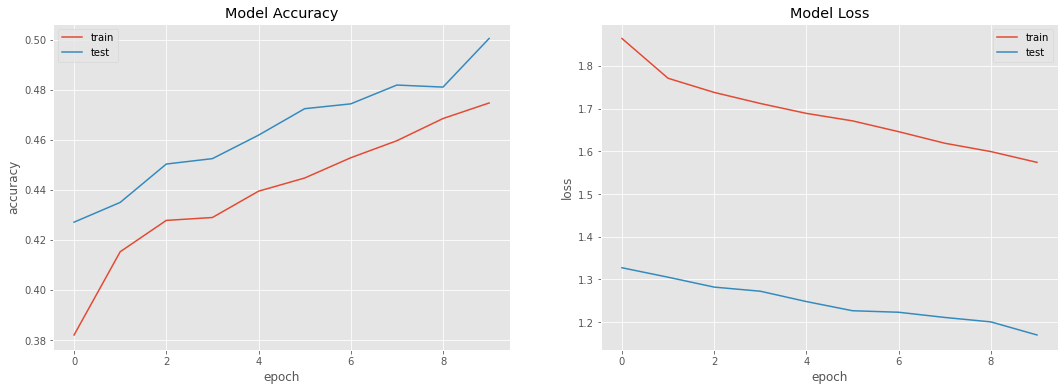

In [ ]:
# list all data in history
# print(history.history.keys())

fig, ax = plt.subplots(1, 2, figsize=(18,6))

# summarize history for accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper right')

plt.show()

## ROC/AUC, TPR, FPR Performance


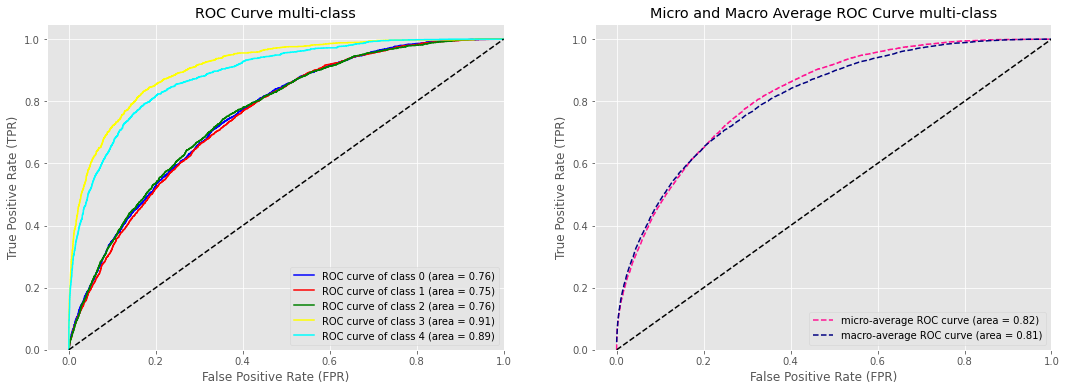

In [ ]:
from itertools import cycle
from sklearn.metrics import roc_curve, auc

y_score = model.predict_proba(X_test)

# Plot linewidth.
lw = 1.5

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_output):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fig, ax = plt.subplots(1, 2, figsize=(18,6))

colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan'])
for i, color in zip(range(n_output), colors):
    ax[0].plot(fpr[i], tpr[i], color=color, lw=lw,
               label='ROC curve of class {0} (area = {1:0.2f})'
               ''.format(i, roc_auc[i]))

ax[0].plot([0, 1], [0, 1], 'k--', lw=1.5)
ax[0].set_xlim([-0.05, 1.0])
ax[0].set_ylim([0.0, 1.05])
ax[0].set_xlabel('False Positive Rate (FPR)')
ax[0].set_ylabel('True Positive Rate (TPR)')
ax[0].set_title('ROC Curve multi-class')
ax[0].legend(loc="lower right")


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_output)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_output):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_output

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

ax[1].plot(fpr["micro"], tpr["micro"],
           label='micro-average ROC curve (area = {0:0.2f})'
                  ''.format(roc_auc["micro"]),
           color='deeppink', linestyle='--', linewidth=lw)

ax[1].plot(fpr["macro"], tpr["macro"],
           label='macro-average ROC curve (area = {0:0.2f})'
                 ''.format(roc_auc["macro"]),
           color='navy', linestyle='--', linewidth=lw)

ax[1].plot([0, 1], [0, 1], 'k--', lw=1.5)
ax[1].set_xlim([-0.05, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate (FPR)')
ax[1].set_ylabel('True Positive Rate (TPR)')
ax[1].set_title('Micro and Macro Average ROC Curve multi-class')
ax[1].legend(loc="lower right")

plt.show()

## Save Model

In [ ]:
# So that later the model can be used without training
model.save("model_stock.h5")
print("Saved model to disk")

Saved model to disk


# **4. Predict New Data**


## Load Model

In [ ]:
from numpy import loadtxt
from keras.models import load_model

In [ ]:
model_stock = load_model('model_stock.h5')
model_stock.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              88064     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                

## Predict Test data

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/upwork/stock_testing_corrected.csv')
df_test.head()

,Unnamed: 0,close,high,low,open,volume,spyClass,marketdir,spyReturn,stkEMA,stkSMA,stkMAMA,stkFAMA,stkUBand,stkMBand,stkLBand,stkSar,stkADX,stkAPO,stkCCI,stkCMO,stkDX,stkMACD,stkMacdSig,stkMacdHis,stkMinusDi,stkMinusDm,stkMOM,stkPlusDi,stkPlusDM,stkPPO,stkROC,stkRSI,stkSlowK,stkSlowD,stkFastk,stkFastd,stkTrix,stkUltoSc,stkWillR,...,stkBull,stkBear,stkEMV,stkCOPP,stkSell,stkSTC,stkApzUpper,stkApzLower,stkVPT,stkFVE,stkWT1,stkVFI,stkMSD,stkFish,stkIFISH,stkTen,stkKij,stkSena,stkSenb,stkChik,stkdirect,debt,ebitda,eps,freeCashFlow,grossMargin,grossProfit,ppeq,rps,sharesBasic,taxExp,marketCap,enterpriseVal,peRatio,pbRatio,trailingPEG1Y,dailyReturns,slope1,intercept,Class
0,0,16.74,20.3600,14.07,19.86,735928510,0.8,17.324525,-4.737897,15.143890,13.292760,17.607684,13.581074,29.377284,15.7560,2.134716,8.250000,40.895581,5.750556,166.281692,0.674016,22.160685,-3.361948,-4.176161,0.814213,18.114898,8.764512,7.70,28.429444,13.754987,-35.857061,85.176991,50.337008,59.302396,47.251528,58.350515,59.302396,-1.448982,51.774410,-41.649485,...,6.228932,-0.061068,0.129887,-54.159026,5.309335,114.759932,17.282719,4.814991,1.813235e+09,-22.912019,-35.383488,-8.526298,7.287665,-0.342133,29.164910,12.017222,19.027192,15.522207,24.136911,29.165385,1.851130,3.407300e+10,-2.633000e+09,-5.260,-9.780000e+08,0.442161,3.765000e+09,4.282500e+10,19.985507,426058744,-649000000.0,7.079254e+09,4.052125e+10,-9.000000,-2.705699,0.006508,-9.951587,6.148683,10.818507,?
1,1,92.46,99.3474,91.03,92.91,47882369,0.8,17.324525,-4.737897,94.444823,87.825126,93.582858,91.241622,100.590665,85.6230,70.655335,69.486122,21.519372,4.751667,105.564142,20.585758,22.797269,2.448873,1.306942,1.141931,15.999144,13.074176,1.75,25.447949,20.795548,-1.212960,1.929225,60.292879,78.646373,86.114803,55.181748,78.646373,0.177976,55.203794,-18.717083,...,11.522638,3.205238,10.241661,9.837463,2.340120,169.066164,101.646962,76.943391,1.343771e+09,22.863362,31.895964,-3.168590,7.497624,2.437688,0.214034,87.867906,85.916067,86.891986,80.263244,74.960769,6.619697,6.704600e+10,4.085000e+09,2.020,3.690000e+09,0.774684,6.677000e+09,2.961000e+09,5.826969,1479156683,88000000.0,1.365396e+11,1.624436e+11,16.306878,-18.444076,0.727199,-1.481087,0.303673,-0.000234,?
2,2,241.68,257.9300,234.00,250.00,2589393,0.8,17.324525,-4.737897,245.120019,213.605033,239.983647,220.816331,241.056706,177.3060,113.555294,160.894304,32.225052,44.459444,144.960282,40.102604,49.221590,10.569915,-1.252517,11.822432,12.031424,31.123449,56.76,35.356527,91.461912,6.405280,30.694354,70.051302,91.956649,93.181165,79.070067,91.956649,-0.831784,75.780030,-11.697388,...,59.105571,35.175571,1325.670198,58.621056,1.341631,968.988168,239.082330,158.667532,1.766190e+08,30.038988,33.934649,-6.193661,31.899391,3.127447,0.429172,196.865572,175.739104,186.302338,192.051369,207.346923,31.514987,0.000000e+00,1.612855e+08,2.595,1.734805e+08,0.809502,4.284340e+08,1.649310e+08,4.586014,45062665,30665500.0,1.086520e+10,1.067286e+10,53.826281,10.221579,-0.939097,-3.254473,1.606206,4.531014,?
3,3,89.02,92.8200,86.94,88.98,29866515,0.8,17.324525,-4.737897,91.399364,84.339637,89.150999,90.346778,100.745258,86.4685,72.191742,76.042384,17.076403,-2.646667,13.761917,3.487835,4.848089,2.036338,1.555699,0.480638,17.135182,14.472020,-0.87,18.881292,15.946750,2.738072,-0.967850,51.743918,42.714272,45.633250,21.355236,42.714272,0.196339,53.433162,-28.601198,...,3.738344,-2.141656,15.842973,18.809846,1.103974,382.185420,102.391398,78.347443,3.599090e+09,25.341793,22.359772,18.058623,7.189749,1.008821,0.007896,91.869222,86.552327,89.210775,85.274231,84.348846,7.059728,1.827200e+10,1.620000e+09,0.320,3.550000e+08,0.575330,4.445000e+09,7.907000e+09,4.381226,1763433243,89000000.0,1.574626e+11,1.723576e+11,44.069307,5.159261,-2.791056,-0.934787,-0.067037,-0.076730,?
4,4,36.25,40.8500,34.63,40.04,9179700,0.8,17.324525,-4.737897,35.923790,36.148385,36.473609,35.364444,51.169327,36.1520,21.134673,20.942800,34.340209,4.953333,139.372256,-1.196948,6.892517,-2.888805,-3

In [ ]:
df_test.drop(['Unnamed: 0','Class'], axis=1, inplace=True)
df_test.head()

,close,high,low,open,volume,spyClass,marketdir,spyReturn,stkEMA,stkSMA,stkMAMA,stkFAMA,stkUBand,stkMBand,stkLBand,stkSar,stkADX,stkAPO,stkCCI,stkCMO,stkDX,stkMACD,stkMacdSig,stkMacdHis,stkMinusDi,stkMinusDm,stkMOM,stkPlusDi,stkPlusDM,stkPPO,stkROC,stkRSI,stkSlowK,stkSlowD,stkFastk,stkFastd,stkTrix,stkUltoSc,stkWillR,stkAD,...,stkCFI,stkBull,stkBear,stkEMV,stkCOPP,stkSell,stkSTC,stkApzUpper,stkApzLower,stkVPT,stkFVE,stkWT1,stkVFI,stkMSD,stkFish,stkIFISH,stkTen,stkKij,stkSena,stkSenb,stkChik,stkdirect,debt,ebitda,eps,freeCashFlow,grossMargin,grossProfit,ppeq,rps,sharesBasic,taxExp,marketCap,enterpriseVal,peRatio,pbRatio,trailingPEG1Y,dailyReturns,slope1,intercept
0,16.74,20.3600,14.07,19.86,735928510,0.8,17.324525,-4.737897,15.143890,13.292760,17.607684,13.581074,29.377284,15.7560,2.134716,8.250000,40.895581,5.750556,166.281692,0.674016,22.160685,-3.361948,-4.176161,0.814213,18.114898,8.764512,7.70,28.429444,13.754987,-35.857061,85.176991,50.337008,59.302396,47.251528,58.350515,59.302396,-1.448982,51.774410,-41.649485,5.927914e+07,...,1.919520e+09,6.228932,-0.061068,0.129887,-54.159026,5.309335,114.759932,17.282719,4.814991,1.813235e+09,-22.912019,-35.383488,-8.526298,7.287665,-0.342133,29.164910,12.017222,19.027192,15.522207,24.136911,29.165385,1.851130,3.407300e+10,-2.633000e+09,-5.260,-9.780000e+08,0.442161,3.765000e+09,4.282500e+10,19.985507,426058744,-649000000.0,7.079254e+09,4.052125e+10,-9.000000,-2.705699,0.006508,-9.951587,6.148683,10.818507
1,92.46,99.3474,91.03,92.91,47882369,0.8,17.324525,-4.737897,94.444823,87.825126,93.582858,91.241622,100.590665,85.6230,70.655335,69.486122,21.519372,4.751667,105.564142,20.585758,22.797269,2.448873,1.306942,1.141931,15.999144,13.074176,1.75,25.447949,20.795548,-1.212960,1.929225,60.292879,78.646373,86.114803,55.181748,78.646373,0.177976,55.203794,-18.717083,1.378457e+09,...,-1.242680e+09,11.522638,3.205238,10.241661,9.837463,2.340120,169.066164,101.646962,76.943391,1.343771e+09,22.863362,31.895964,-3.168590,7.497624,2.437688,0.214034,87.867906,85.916067,86.891986,80.263244,74.960769,6.619697,6.704600e+10,4.085000e+09,2.020,3.690000e+09,0.774684,6.677000e+09,2.961000e+09,5.826969,1479156683,88000000.0,1.365396e+11,1.624436e+11,16.306878,-18.444076,0.727199,-1.481087,0.303673,-0.000234
2,241.68,257.9300,234.00,250.00,2589393,0.8,17.324525,-4.737897,245.120019,213.605033,239.983647,220.816331,241.056706,177.3060,113.555294,160.894304,32.225052,44.459444,144.960282,40.102604,49.221590,10.569915,-1.252517,11.822432,12.031424,31.123449,56.76,35.356527,91.461912,6.405280,30.694354,70.051302,91.956649,93.181165,79.070067,91.956649,-0.831784,75.780030,-11.697388,1.063057e+08,...,-6.385256e+08,59.105571,35.175571,1325.670198,58.621056,1.341631,968.988168,239.082330,158.667532,1.766190e+08,30.038988,33.934649,-6.193661,31.899391,3.127447,0.429172,196.865572,175.739104,186.302338,192.051369,207.346923,31.514987,0.000000e+00,1.612855e+08,2.595,1.734805e+08,0.809502,4.284340e+08,1.649310e+08,4.586014,45062665,30665500.0,1.086520e+10,1.067286e+10,53.826281,10.221579,-0.939097,-3.254473,1.606206,4.531014
3,89.02,92.8200,86.94,88.98,29866515,0.8,17.324525,-4.737897,91.399364,84.339637,89.150999,90.346778,100.745258,86.4685,72.191742,76.042384,17.076403,-2.646667,13.761917,3.487835,4.848089,2.036338,1.555699,0.480638,17.135182,14.472020,-0.87,18.881292,15.946750,2.738072,-0.967850,51.743918,42.714272,45.633250,21.355236,42.714272,0.196339,53.433162,-28.601198,2.619377e+09,...,-2.518456e+08,3.738344,-2.141656,15.842973,18.809846,1.103974,382.185420,102.391398,78.347443,3.599090e+09,25.341793,22.359772,18.058623,7.189749,1.008821,0.007896,91.869222,86.552327,89.210775,85.274231,84.348846,7.059728,1.827200e+10,1.620000e+09,0.320,3.550000e+08,0.575330,4.445000e+09,7.907000e+09,4.381226,1763433243,89000000.0,1.574626e+11,1.723576e+11,44.069307,5.159261,-2.791056,-0.934787,-0.067037,-0.076730
4,36.25,40.8500,34.63,40.04,9179700,0.8,17.324525,-4.737897,35.923790,36.148385,36.473609,35.364444,51.169327,36.1

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Columns: 115 entries, close to intercept
dtypes: float64(112), int64(3)
memory usage: 217.5 KB


In [ ]:
X_new = df_test
X_new.head()

,close,high,low,open,volume,spyClass,marketdir,spyReturn,stkEMA,stkSMA,stkMAMA,stkFAMA,stkUBand,stkMBand,stkLBand,stkSar,stkADX,stkAPO,stkCCI,stkCMO,stkDX,stkMACD,stkMacdSig,stkMacdHis,stkMinusDi,stkMinusDm,stkMOM,stkPlusDi,stkPlusDM,stkPPO,stkROC,stkRSI,stkSlowK,stkSlowD,stkFastk,stkFastd,stkTrix,stkUltoSc,stkWillR,stkAD,...,stkCFI,stkBull,stkBear,stkEMV,stkCOPP,stkSell,stkSTC,stkApzUpper,stkApzLower,stkVPT,stkFVE,stkWT1,stkVFI,stkMSD,stkFish,stkIFISH,stkTen,stkKij,stkSena,stkSenb,stkChik,stkdirect,debt,ebitda,eps,freeCashFlow,grossMargin,grossProfit,ppeq,rps,sharesBasic,taxExp,marketCap,enterpriseVal,peRatio,pbRatio,trailingPEG1Y,dailyReturns,slope1,intercept
0,16.74,20.3600,14.07,19.86,735928510,0.8,17.324525,-4.737897,15.143890,13.292760,17.607684,13.581074,29.377284,15.7560,2.134716,8.250000,40.895581,5.750556,166.281692,0.674016,22.160685,-3.361948,-4.176161,0.814213,18.114898,8.764512,7.70,28.429444,13.754987,-35.857061,85.176991,50.337008,59.302396,47.251528,58.350515,59.302396,-1.448982,51.774410,-41.649485,5.927914e+07,...,1.919520e+09,6.228932,-0.061068,0.129887,-54.159026,5.309335,114.759932,17.282719,4.814991,1.813235e+09,-22.912019,-35.383488,-8.526298,7.287665,-0.342133,29.164910,12.017222,19.027192,15.522207,24.136911,29.165385,1.851130,3.407300e+10,-2.633000e+09,-5.260,-9.780000e+08,0.442161,3.765000e+09,4.282500e+10,19.985507,426058744,-649000000.0,7.079254e+09,4.052125e+10,-9.000000,-2.705699,0.006508,-9.951587,6.148683,10.818507
1,92.46,99.3474,91.03,92.91,47882369,0.8,17.324525,-4.737897,94.444823,87.825126,93.582858,91.241622,100.590665,85.6230,70.655335,69.486122,21.519372,4.751667,105.564142,20.585758,22.797269,2.448873,1.306942,1.141931,15.999144,13.074176,1.75,25.447949,20.795548,-1.212960,1.929225,60.292879,78.646373,86.114803,55.181748,78.646373,0.177976,55.203794,-18.717083,1.378457e+09,...,-1.242680e+09,11.522638,3.205238,10.241661,9.837463,2.340120,169.066164,101.646962,76.943391,1.343771e+09,22.863362,31.895964,-3.168590,7.497624,2.437688,0.214034,87.867906,85.916067,86.891986,80.263244,74.960769,6.619697,6.704600e+10,4.085000e+09,2.020,3.690000e+09,0.774684,6.677000e+09,2.961000e+09,5.826969,1479156683,88000000.0,1.365396e+11,1.624436e+11,16.306878,-18.444076,0.727199,-1.481087,0.303673,-0.000234
2,241.68,257.9300,234.00,250.00,2589393,0.8,17.324525,-4.737897,245.120019,213.605033,239.983647,220.816331,241.056706,177.3060,113.555294,160.894304,32.225052,44.459444,144.960282,40.102604,49.221590,10.569915,-1.252517,11.822432,12.031424,31.123449,56.76,35.356527,91.461912,6.405280,30.694354,70.051302,91.956649,93.181165,79.070067,91.956649,-0.831784,75.780030,-11.697388,1.063057e+08,...,-6.385256e+08,59.105571,35.175571,1325.670198,58.621056,1.341631,968.988168,239.082330,158.667532,1.766190e+08,30.038988,33.934649,-6.193661,31.899391,3.127447,0.429172,196.865572,175.739104,186.302338,192.051369,207.346923,31.514987,0.000000e+00,1.612855e+08,2.595,1.734805e+08,0.809502,4.284340e+08,1.649310e+08,4.586014,45062665,30665500.0,1.086520e+10,1.067286e+10,53.826281,10.221579,-0.939097,-3.254473,1.606206,4.531014
3,89.02,92.8200,86.94,88.98,29866515,0.8,17.324525,-4.737897,91.399364,84.339637,89.150999,90.346778,100.745258,86.4685,72.191742,76.042384,17.076403,-2.646667,13.761917,3.487835,4.848089,2.036338,1.555699,0.480638,17.135182,14.472020,-0.87,18.881292,15.946750,2.738072,-0.967850,51.743918,42.714272,45.633250,21.355236,42.714272,0.196339,53.433162,-28.601198,2.619377e+09,...,-2.518456e+08,3.738344,-2.141656,15.842973,18.809846,1.103974,382.185420,102.391398,78.347443,3.599090e+09,25.341793,22.359772,18.058623,7.189749,1.008821,0.007896,91.869222,86.552327,89.210775,85.274231,84.348846,7.059728,1.827200e+10,1.620000e+09,0.320,3.550000e+08,0.575330,4.445000e+09,7.907000e+09,4.381226,1763433243,89000000.0,1.574626e+11,1.723576e+11,44.069307,5.159261,-2.791056,-0.934787,-0.067037,-0.076730
4,36.25,40.8500,34.63,40.04,9179700,0.8,17.324525,-4.737897,35.923790,36.148385,36.473609,35.364444,51.169327,36.1

In [ ]:
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()
X_new = standardization.fit_transform(X_new)
X_new

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=85)
X_new = pca.fit_transform(X_new)
X_new

array([[-6.59836478e+00,  9.81948529e+00, -2.24771920e+00, ...,
         5.33033737e-03,  3.46750161e-03, -7.96346927e-03],
       [ 1.12953810e-01, -2.69619171e+00, -3.22270764e+00, ...,
         3.12934395e-02,  1.08808857e-02, -2.89689330e-03],
       [ 7.18150496e+00, -4.36122557e-01, -8.77145852e+00, ...,
        -5.31663098e-03, -2.61494909e-02,  2.00949957e-02],
       ...,
       [-1.01745714e+00,  2.25007471e-01, -2.61829842e+00, ...,
         1.23286148e-02, -1.29498924e-02,  8.47571673e-03],
       [-6.27562954e-02,  1.96230963e+00, -1.03064201e+00, ...,
        -6.38297353e-04, -2.08863060e-03, -4.28178682e-03],
       [ 9.68787969e-01, -1.51484940e+00, -1.52832938e+00, ...,
        -4.35643995e-04, -1.70488451e-02, -2.70895890e-03]])

In [ ]:
def predict(data):
  labels = ['Buy', 'Hold ', 'sell', 'strongBuy', 'strongSell']
  return [labels[i] for i in model_stock.predict_classes(data)]

In [ ]:
y_new = predict(X_new)
df_test['Class'] = y_new
df_test.head()

,close,high,low,open,volume,spyClass,marketdir,spyReturn,stkEMA,stkSMA,stkMAMA,stkFAMA,stkUBand,stkMBand,stkLBand,stkSar,stkADX,stkAPO,stkCCI,stkCMO,stkDX,stkMACD,stkMacdSig,stkMacdHis,stkMinusDi,stkMinusDm,stkMOM,stkPlusDi,stkPlusDM,stkPPO,stkROC,stkRSI,stkSlowK,stkSlowD,stkFastk,stkFastd,stkTrix,stkUltoSc,stkWillR,stkAD,...,stkBull,stkBear,stkEMV,stkCOPP,stkSell,stkSTC,stkApzUpper,stkApzLower,stkVPT,stkFVE,stkWT1,stkVFI,stkMSD,stkFish,stkIFISH,stkTen,stkKij,stkSena,stkSenb,stkChik,stkdirect,debt,ebitda,eps,freeCashFlow,grossMargin,grossProfit,ppeq,rps,sharesBasic,taxExp,marketCap,enterpriseVal,peRatio,pbRatio,trailingPEG1Y,dailyReturns,slope1,intercept,Class
0,16.74,20.3600,14.07,19.86,735928510,0.8,17.324525,-4.737897,15.143890,13.292760,17.607684,13.581074,29.377284,15.7560,2.134716,8.250000,40.895581,5.750556,166.281692,0.674016,22.160685,-3.361948,-4.176161,0.814213,18.114898,8.764512,7.70,28.429444,13.754987,-35.857061,85.176991,50.337008,59.302396,47.251528,58.350515,59.302396,-1.448982,51.774410,-41.649485,5.927914e+07,...,6.228932,-0.061068,0.129887,-54.159026,5.309335,114.759932,17.282719,4.814991,1.813235e+09,-22.912019,-35.383488,-8.526298,7.287665,-0.342133,29.164910,12.017222,19.027192,15.522207,24.136911,29.165385,1.851130,3.407300e+10,-2.633000e+09,-5.260,-9.780000e+08,0.442161,3.765000e+09,4.282500e+10,19.985507,426058744,-649000000.0,7.079254e+09,4.052125e+10,-9.000000,-2.705699,0.006508,-9.951587,6.148683,10.818507,strongBuy
1,92.46,99.3474,91.03,92.91,47882369,0.8,17.324525,-4.737897,94.444823,87.825126,93.582858,91.241622,100.590665,85.6230,70.655335,69.486122,21.519372,4.751667,105.564142,20.585758,22.797269,2.448873,1.306942,1.141931,15.999144,13.074176,1.75,25.447949,20.795548,-1.212960,1.929225,60.292879,78.646373,86.114803,55.181748,78.646373,0.177976,55.203794,-18.717083,1.378457e+09,...,11.522638,3.205238,10.241661,9.837463,2.340120,169.066164,101.646962,76.943391,1.343771e+09,22.863362,31.895964,-3.168590,7.497624,2.437688,0.214034,87.867906,85.916067,86.891986,80.263244,74.960769,6.619697,6.704600e+10,4.085000e+09,2.020,3.690000e+09,0.774684,6.677000e+09,2.961000e+09,5.826969,1479156683,88000000.0,1.365396e+11,1.624436e+11,16.306878,-18.444076,0.727199,-1.481087,0.303673,-0.000234,Buy
2,241.68,257.9300,234.00,250.00,2589393,0.8,17.324525,-4.737897,245.120019,213.605033,239.983647,220.816331,241.056706,177.3060,113.555294,160.894304,32.225052,44.459444,144.960282,40.102604,49.221590,10.569915,-1.252517,11.822432,12.031424,31.123449,56.76,35.356527,91.461912,6.405280,30.694354,70.051302,91.956649,93.181165,79.070067,91.956649,-0.831784,75.780030,-11.697388,1.063057e+08,...,59.105571,35.175571,1325.670198,58.621056,1.341631,968.988168,239.082330,158.667532,1.766190e+08,30.038988,33.934649,-6.193661,31.899391,3.127447,0.429172,196.865572,175.739104,186.302338,192.051369,207.346923,31.514987,0.000000e+00,1.612855e+08,2.595,1.734805e+08,0.809502,4.284340e+08,1.649310e+08,4.586014,45062665,30665500.0,1.086520e+10,1.067286e+10,53.826281,10.221579,-0.939097,-3.254473,1.606206,4.531014,strongBuy
3,89.02,92.8200,86.94,88.98,29866515,0.8,17.324525,-4.737897,91.399364,84.339637,89.150999,90.346778,100.745258,86.4685,72.191742,76.042384,17.076403,-2.646667,13.761917,3.487835,4.848089,2.036338,1.555699,0.480638,17.135182,14.472020,-0.87,18.881292,15.946750,2.738072,-0.967850,51.743918,42.714272,45.633250,21.355236,42.714272,0.196339,53.433162,-28.601198,2.619377e+09,...,3.738344,-2.141656,15.842973,18.809846,1.103974,382.185420,102.391398,78.347443,3.599090e+09,25.341793,22.359772,18.058623,7.189749,1.008821,0.007896,91.869222,86.552327,89.210775,85.274231,84.348846,7.059728,1.827200e+10,1.620000e+09,0.320,3.550000e+08,0.575330,4.445000e+09,7.907000e+09,4.381226,1763433243,89000000.0,1.574626e+11,1.723576e+11,44.069307,5.159261,-2.791056,-0.934787,-0.067037,-0.076730,Hold
4,36.25,40.8500,34.63,40.04,9179700,0.8,17.324525,-4.737897,35.923790,36.148385,36.473609,35.364444,51.169327,36.1520,21.134673,20.942800,34.

In [ ]:
df_test.to_csv('stock_prediction.csv')